In [124]:
## IMPORT DATA
import matplotlib.pyplot as plt  
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np
import os 
import sklearn
from sklearn.model_selection import LeaveOneOut
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import sys


import gzip
import os
import copy
import random


from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
import seaborn as sns

from sklearn.model_selection import GridSearchCV
from matplotlib.pyplot import figure

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import graphviz 


from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import AdaBoostRegressor

In [125]:
item=pd.read_csv('item_to_id.csv')

In [126]:
purchase=pd.read_csv('purchase_history.csv')

In [127]:
item.head(20)

,Item_name,Item_id
0,coffee,43
1,tea,23
2,juice,38
3,soda,9
4,sandwich loaves,39
5,dinner rolls,37
6,tortillas,34
7,bagels,13
8,canned vegetables,28
9,spaghetti sauce,26


In [128]:
purchase.head()

,user_id,id
0,222087,"27,26"
1,1343649,"6,47,17"
2,404134,"18,12,23,22,27,43,38,20,35,1"
3,1110200,"9,23,2,20,26,47,37"
4,224107,"31,18,5,13,1,21,48,16,26,2,44,32,20,37,42,35,4..."


In [129]:
purchase_df = purchase.assign(Item_id = purchase['id'].str.split(',')).explode('Item_id').drop(columns = 'id')
purchase_df

,user_id,Item_id
0,222087,27
0,222087,26
1,1343649,6
1,1343649,47
1,1343649,17
...,...,...
39473,517744,38
39473,517744,43
39473,517744,28
39473,517744,25


In [130]:
purchase_df.shape

(319995, 2)

In [131]:
purchase_df.dtypes

user_id     int64
Item_id    object
dtype: object

In [132]:
purchase_df['Item_id'] = pd.to_numeric(purchase_df['Item_id'])


In [133]:
purchase_df.dtypes

user_id    int64
Item_id    int64
dtype: object

In [233]:
df = pd.merge(left = purchase_df, right = item, left_on = 'Item_id', right_on = 'Item_id', how = 'left')


In [234]:
df

,user_id,Item_id,Item_name
0,222087,27,dishwashing
1,222087,26,spaghetti sauce
2,1343649,6,poultry
3,1343649,47,pork
4,1343649,17,beef
...,...,...,...
319990,517744,38,juice
319991,517744,43,coffee
319992,517744,28,canned vegetables
319993,517744,25,cherries


The company founder wants to meet with some of the best customers to go through a focus group with them. You are asked to send the ID of the following customers to the founder:

the customer who bought the most items overall in her lifetime

for each item, the customer who bought that product the most

Cluster items based on user co-purchase history.
That is, create clusters of products that have the highest probability of being bought together. 
The goal of this is to replace the old/manually created categories with these new ones. Each item can belong to just one cluster.



## the customer who bought the most items overall in her lifetime


In [136]:
df.groupby('user_id')['Item_id'].agg(['sum','count']).sort_values('count',ascending=False)

,sum,count
user_id,,
269335,1711,72
367872,1771,70
397623,1571,64
599172,1493,64
377284,1636,63
...,...,...
134092,41,1
470804,25,1
16919,39,1


In [240]:
df.head()

,user_id,Item_id,Item_name
0,222087,27,dishwashing
1,222087,26,spaghetti sauce
2,1343649,6,poultry
3,1343649,47,pork
4,1343649,17,beef


In [34]:
#df.groupby(['Item_name'])['user_id'].agg(['count']).sort_values('count',ascending=False)

In [138]:
freq_df=df.groupby(['Item_name','user_id'])['Item_id'].agg(['count']).sort_values('count',ascending=False).reset_index()

In [139]:
freq_df.drop_duplicates(subset='Item_name').reset_index()

,index,Item_name,user_id,count
0,0,lettuce,269335,5
1,1,tea,920002,5
2,2,cauliflower,1198106,5
3,3,sandwich loaves,599172,5
4,4,laundry detergent,917199,5
5,6,soda,1310896,4
6,7,dinner rolls,46757,4
7,8,cucumbers,80215,4
8,9,carrots,618914,4
9,10,berries,38872,4


In [140]:
freq_df.head()

,Item_name,user_id,count
0,lettuce,269335,5
1,tea,920002,5
2,cauliflower,1198106,5
3,sandwich loaves,599172,5
4,laundry detergent,917199,5


In [143]:
pd.get_dummies(df['Item_name']).head()
item_dummies = pd.concat([df['user_id'], pd.get_dummies(df['Item_name'])], axis=1)
item_data = item_dummies.groupby(by=['user_id']).agg('sum')


In [144]:
item_data.head()

,aluminum foil,apples,baby items,bagels,bananas,beef,berries,broccoli,butter,canned vegetables,...,shaving cream,soap,soda,spaghetti sauce,sugar,tea,toilet paper,tortillas,waffles,yogurt
user_id,,,,,,,,,,,,,,,,,,,,,
47,1,0,1,1,1,0,0,1,0,1,...,0,0,0,0,0,1,0,0,0,0
68,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
113,1,1,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
123,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
223,0,1,0,0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0


In [145]:
### for each item, the customer who bought that product the most


item_user_most = item_data.apply(np.argmax, axis=0).reset_index()
item_user_most_ = item_user_most.rename(columns={'index': 'Item_id', 0: 'User_id'})

In [146]:
item_user_most_

,Item_id,User_id
0,aluminum foil,2356
1,apples,1771
2,baby items,92
3,bagels,10799
4,bananas,20214
5,beef,6085
6,berries,634
7,broccoli,512
8,butter,2493
9,canned vegetables,3400


In [159]:
purchase_df.head()

,user_id,Item_id
0,222087,27
0,222087,26
1,1343649,6
1,1343649,47
1,1343649,17


In [160]:
## for each item, the customer who bought that product the most


In [161]:

purchase_df_cnt=purchase_df.groupby(['user_id','Item_id'])['Item_id'].agg(['count']).sort_values('count',ascending=False).reset_index()

In [162]:
purchase_df_cnt.head()

,user_id,Item_id,count
0,269335,2,5
1,599172,39,5
2,1198106,45,5
3,917199,18,5
4,920002,23,5


In [168]:
wide = purchase_df_cnt.pivot_table(index=['Item_id'], columns=['user_id'],values=['count'])


In [169]:
wide.head()

count                                                          \
user_id 47      68      113     123     223     281     323     394       
Item_id                                                                   
1           NaN     NaN     NaN     NaN     1.0     NaN     1.0     1.0   
2           1.0     NaN     NaN     NaN     1.0     NaN     NaN     1.0   
3           1.0     NaN     1.0     NaN     NaN     1.0     NaN     NaN   
4           1.0     NaN     NaN     1.0     NaN     NaN     NaN     NaN   
5           NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   

                         ...                                                  \
user_id 420     453      ... 1499502 1499523 1499563 1499702 1499727 1499730   
Item_id                  ...                                                   
1           NaN     1.0  ...     NaN     NaN     1.0     NaN     NaN     NaN   
2           1.0     1.0  ...     1.0     NaN     1.0     NaN     NaN     NaN   
3           NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   
4           NaN     NaN  ...     NaN     1.0     NaN     NaN     NaN     NaN   
5           NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   

                                         
user_id 1499778 1499797 1499817 1499974  
Item_id                                  
1           NaN     NaN     1.0     NaN  
2           1.0     NaN     2.0     NaN  
3           NaN     1.0     NaN     NaN  
4           NaN     NaN     NaN     NaN  
5           NaN     NaN     NaN     1.0  

[5 rows x 24885 columns]

In [171]:
wide.fillna(0,inplace=True)
wide.head()

count                                                          \
user_id 47      68      113     123     223     281     323     394       
Item_id                                                                   
1           0.0     0.0     0.0     0.0     1.0     0.0     1.0     1.0   
2           1.0     0.0     0.0     0.0     1.0     0.0     0.0     1.0   
3           1.0     0.0     1.0     0.0     0.0     1.0     0.0     0.0   
4           1.0     0.0     0.0     1.0     0.0     0.0     0.0     0.0   
5           0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

                         ...                                                  \
user_id 420     453      ... 1499502 1499523 1499563 1499702 1499727 1499730   
Item_id                  ...                                                   
1           0.0     1.0  ...     0.0     0.0     1.0     0.0     0.0     0.0   
2           1.0     1.0  ...     1.0     0.0     1.0     0.0     0.0     0.0   
3           0.0     0.0  ...     0.0     0.0     0.0     0.0     0.0     0.0   
4           0.0     0.0  ...     0.0     1.0     0.0     0.0     0.0     0.0   
5           0.0     0.0  ...     0.0     0.0     0.0     0.0     0.0     0.0   

                                         
user_id 1499778 1499797 1499817 1499974  
Item_id                                  
1           0.0     0.0     1.0     0.0  
2           1.0     0.0     2.0     0.0  
3           0.0     1.0     0.0     0.0  
4           0.0     0.0     0.0     0.0  
5           0.0     0.0     0.0     1.0  

[5 rows x 24885 columns]

In [ ]:
pd.get_dummies(full['Item_name']).head()


## Cluster items based on user co-purchase history.
That is, create clusters of products that have the highest probability of being bought together. 
The goal of this is to replace the old/manually created categories with these new ones. Each item can belong to just one cluster.


In [184]:

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [172]:
wide.head()

count                                                          \
user_id 47      68      113     123     223     281     323     394       
Item_id                                                                   
1           0.0     0.0     0.0     0.0     1.0     0.0     1.0     1.0   
2           1.0     0.0     0.0     0.0     1.0     0.0     0.0     1.0   
3           1.0     0.0     1.0     0.0     0.0     1.0     0.0     0.0   
4           1.0     0.0     0.0     1.0     0.0     0.0     0.0     0.0   
5           0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

                         ...                                                  \
user_id 420     453      ... 1499502 1499523 1499563 1499702 1499727 1499730   
Item_id                  ...                                                   
1           0.0     1.0  ...     0.0     0.0     1.0     0.0     0.0     0.0   
2           1.0     1.0  ...     1.0     0.0     1.0     0.0     0.0     0.0   
3           0.0     0.0  ...     0.0     0.0     0.0     0.0     0.0     0.0   
4           0.0     0.0  ...     0.0     1.0     0.0     0.0     0.0     0.0   
5           0.0     0.0  ...     0.0     0.0     0.0     0.0     0.0     0.0   

                                         
user_id 1499778 1499797 1499817 1499974  
Item_id                                  
1           0.0     0.0     1.0     0.0  
2           1.0     0.0     2.0     0.0  
3           0.0     1.0     0.0     0.0  
4           0.0     0.0     0.0     0.0  
5           0.0     0.0     0.0     1.0  

[5 rows x 24885 columns]

In [ ]:
feature=wide

In [186]:
# determine the best number of clusters
clusters = range(2, 30)
inertias = []
silhouettes = []

for n_clusters in clusters:
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42, n_jobs=-1)
    kmeans = kmeans.fit(feature)
    label = kmeans.predict(feature)
    
    inertias.append(kmeans.inertia_)
    silhouettes.append(silhouette_score(feature, label))

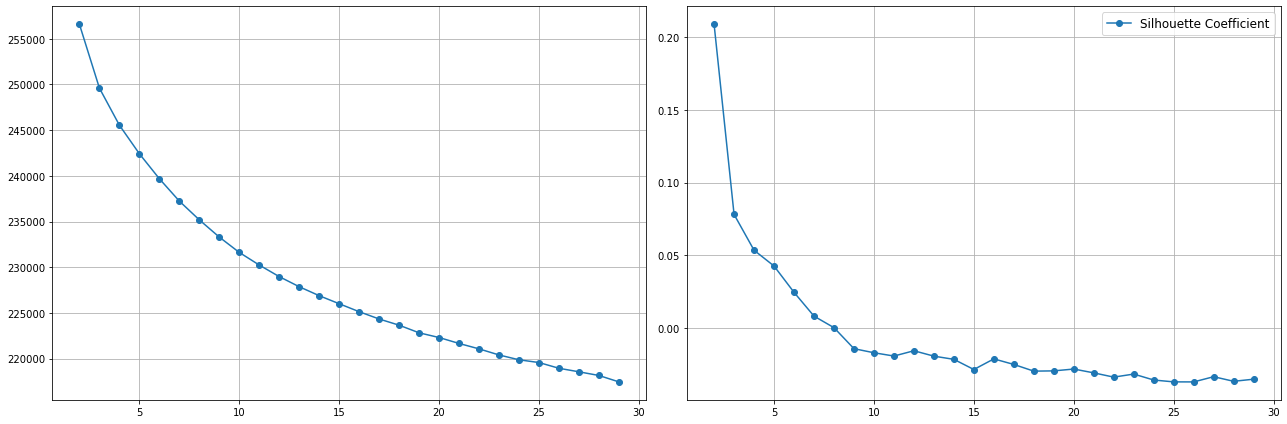

In [187]:

# visualization
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
ax[0].plot(clusters, inertias, 'o-', label='Sum of Squared Distances')
ax[0].grid(True)
ax[1].plot(clusters, silhouettes, 'o-', label='Silhouette Coefficient')
ax[1].grid(True)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

In [189]:
# it seems like 21 is best cluster
#build K-Means model
kmeans = KMeans(n_clusters=21, init='k-means++', random_state=42, n_jobs=-1)
kmeans = kmeans.fit(feature)
label = kmeans.predict(feature)

In [192]:

# PCA for dimension reduction
pca = PCA(n_components=2, random_state=42)
pca = pca.fit(feature)
pca_feature = pca.transform(feature)

IndexError: index 0 is out of bounds for axis 0 with size 0

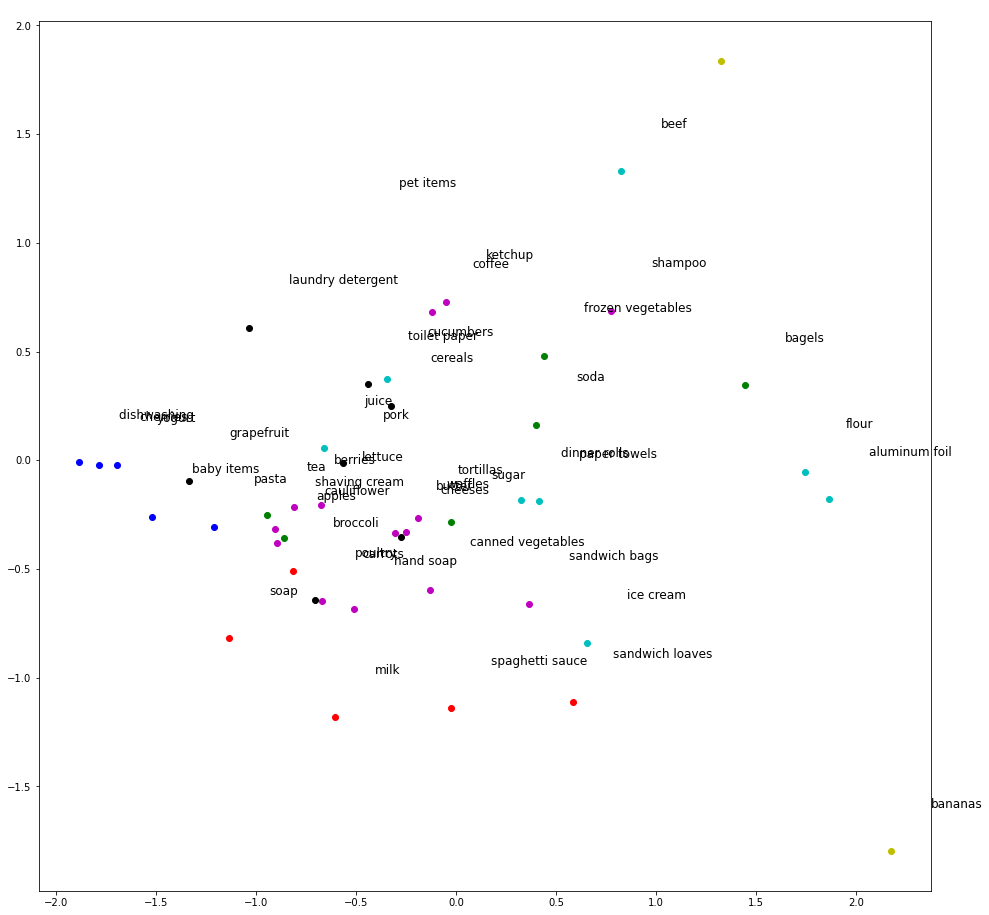

In [200]:
# visualization in 2D
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']

fig, ax = plt.subplots(figsize=(16, 16))
for j in range(len(pca_feature)):
    x = pca_feature[j][0]
    y = pca_feature[j][1]
    ax.plot(x, y, 'o', color=colors[label[j] % 8])
    name = item[item['Item_id'] == j + 1]['Item_name']
    ax.annotate(xy=(x+0.2, y+0.2), s=name.values[0], fontsize=12)

plt.show()


In [ ]:
# 48 rows for 48 product for k means
# for columns how many other product bought at the same time
#cluser doenst means to the end, but leads to another step of recommendation, always followed by follow-up

# subscription retention rate



In [203]:
#pip install efficient-apriori


Note: you may need to restart the kernel to use updated packages.


In [204]:
from efficient_apriori import apriori


In [239]:
purchase_df.columns

Index(['user_id', 'Item_id'], dtype='object')

In [216]:
df['binary']=1

In [221]:
df.drop(columns=['user_id','Item_id'], inplace=True)

In [224]:
df_a=df.pivot(columns='Item_name').fillna(0)

In [225]:
df_a.head()

binary                                                \
Item_name aluminum foil apples baby items bagels bananas beef berries   
0                   0.0    0.0        0.0    0.0     0.0  0.0     0.0   
1                   0.0    0.0        0.0    0.0     0.0  0.0     0.0   
2                   0.0    0.0        0.0    0.0     0.0  0.0     0.0   
3                   0.0    0.0        0.0    0.0     0.0  0.0     0.0   
4                   0.0    0.0        0.0    0.0     0.0  1.0     0.0   

                                             ...                          \
Item_name broccoli butter canned vegetables  ... shaving cream soap soda   
0              0.0    0.0               0.0  ...           0.0  0.0  0.0   
1              0.0    0.0               0.0  ...           0.0  0.0  0.0   
2              0.0    0.0               0.0  ...           0.0  0.0  0.0   
3              0.0    0.0               0.0  ...           0.0  0.0  0.0   
4              0.0    0.0               0.0  ...           0.0  0.0  0.0   

                                                                            
Item_name spaghetti sauce sugar  tea toilet paper tortillas waffles yogurt  
0                     0.0   0.0  0.0          0.0       0.0     0.0    0.0  
1                     1.0   0.0  0.0          0.0       0.0     0.0    0.0  
2                     0.0   0.0  0.0          0.0       0.0     0.0    0.0  
3                     0.0   0.0  0.0          0.0       0.0     0.0    0.0  
4                     0.0   0.0  0.0          0.0       0.0     0.0    0.0  

[5 rows x 48 columns]

In [241]:
df.head()

,user_id,Item_id,Item_name
0,222087,27,dishwashing
1,222087,26,spaghetti sauce
2,1343649,6,poultry
3,1343649,47,pork
4,1343649,17,beef


In [242]:
trans=list(df['Item_name'].map(tuple))

In [243]:
Itemset,rules =apriori(trans, min_support=0.075, min_confidence=0.25)

In [244]:
rules

[{d} -> {a},
 {g} -> {a},
 {a} -> {g},
 {h} -> {a},
 {i} -> {a},
 {a} -> {i},
 {n} -> {a},
 {a} -> {n},
 {s} -> {a},
 {a} -> {s},
 {w} -> {a},
 {d} -> {i},
 {n} -> {d},
 {d} -> {n},
 {s} -> {d},
 {d} -> {s},
 {g} -> {i},
 {n} -> {g},
 {g} -> {n},
 {s} -> {g},
 {g} -> {s},
 {i} -> {h},
 {h} -> {i},
 {n} -> {h},
 {h} -> {n},
 {s} -> {h},
 {h} -> {s},
 {n} -> {i},
 {i} -> {n},
 {s} -> {i},
 {i} -> {s},
 {w} -> {i},
 {s} -> {n},
 {n} -> {s},
 {w} -> {s},
 {a} -> { },
 { } -> {a},
 {c} -> { },
 { } -> {c},
 {e} -> { },
 { } -> {e},
 {g} -> { },
 { } -> {g},
 {h} -> { },
 { } -> {h},
 {i} -> { },
 { } -> {i},
 {s} -> { },
 { } -> {s},
 {t} -> { },
 { } -> {t},
 {c} -> {a},
 {a} -> {c},
 {e} -> {a},
 {a} -> {e},
 {p} -> {a},
 {a} -> {p},
 {t} -> {a},
 {a} -> {t},
 {u} -> {a},
 {e} -> {c},
 {c} -> {e},
 {h} -> {c},
 {c} -> {h},
 {i} -> {c},
 {c} -> {i},
 {s} -> {c},
 {c} -> {s},
 {t} -> {c},
 {c} -> {t},
 {u} -> {c},
 {c} -> {u},
 {g} -> {e},
 {h} -> {e},
 {i} -> {e},
 {e} -> {i},
 {p} -> {e},